### Import Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
messages=pd.read_csv('sms_spam.csv',sep=',')

In [3]:
message_type1=messages.iloc[:,0]

In [4]:
message_text1=messages.iloc[:,1]

In [5]:
messages['text_length']=message_text1.apply(len)

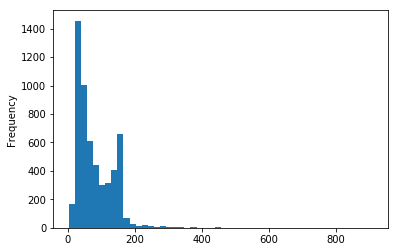

In [6]:
messages['text_length'].plot(bins=50,kind='hist')

In [7]:
message_text,message_text_test,message_type,message_type_test=train_test_split(message_text1,message_type1,test_size=0.20,random_state=22)

In [8]:
type(message_text)

pandas.core.series.Series

In [9]:
message_type.head(5)

2929     ham
287      ham
183      ham
813     spam
801     spam
Name: type, dtype: object

In [10]:
message_text.head(5)

2929                                          Anything...
287                                                  Ok..
183     ok. I am a gentleman and will treat you with d...
813     Congratulations ur awarded either £500 of CD g...
801     Last Chance! Claim ur £150 worth of discount v...
Name: text, dtype: object

In [11]:
cv=CountVectorizer()

In [12]:
cv_count=cv.fit_transform(message_text)

In [13]:
#print(cv.get_feature_names())

### Create Object of MultinomialNB


In [14]:
nb=MultinomialNB()

In [15]:
nb.fit(cv_count,message_type)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
predict=cv.transform(message_text_test)

In [17]:
y_pred=nb.predict(predict)

In [18]:
y_pred

array(['spam', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

### Model Accuracy

In [19]:
accuracy_score=accuracy_score(message_type_test,y_pred)*100
accuracy_score

98.11659192825111

### Sample Check

In [20]:
#accuracy_score(sample_predict)

In [21]:
sample=pd.Series(['Association fee invoice generated for All the owners who are yet to pay association fee 2k.  Now we got pan number as well so if anyone has  concerns they can approach MC team.',
                  'Text FA to 87121 to receive entry question(std txt rate)T&C''s apply 08452810075over18s',
                  'For the first time, we’re presenting a safe, zero-risk opportunity to own your favourite Total Environment home. Book your home before April 15, 2020 and enjoy a Price Protection Guarantee until December 31, 2020. Designed to safeguard your investment against market fluctuations, the Price Protection Guarantee will give you peace of mind – an offer designed with you in mind, just like our homes are.Now, you can experience a Total Environment home without leaving yours through a virtual tour. If you’re interested, hit reply and we’ll connect with you for further discussions.'
                 ]
                 )

In [22]:
sample[0]

'Association fee invoice generated for All the owners who are yet to pay association fee 2k.  Now we got pan number as well so if anyone has  concerns they can approach MC team.'

In [23]:
sample[1]

'Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18s'

In [24]:
type(sample)

pandas.core.series.Series

### Convert above samples by CountVectorizer

In [25]:
sample_predict=cv.transform(sample)

### Predict New Data

In [26]:
nb.predict(sample_predict)

array(['ham', 'spam', 'ham'], dtype='<U4')